In [12]:
from plot_utilities import matplotlib_nikita_style
matplotlib_nikita_style()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

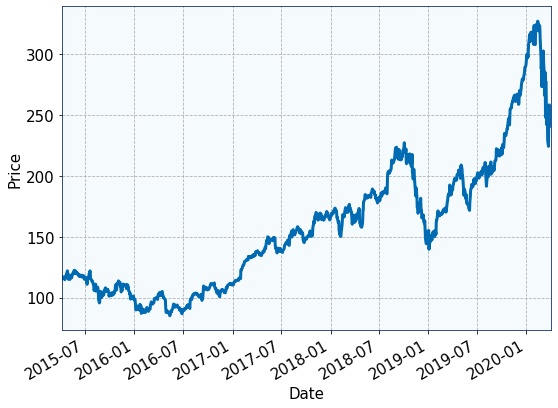

In [13]:
from plot_utilities import cdfplot
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as stats
import math
import pandas as pd


# Data fetching for the AAPL stock
data = yf.download('AAPL',period="5y")
# Plot the adusted closing price of the AAPL
data['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')

Daily return: 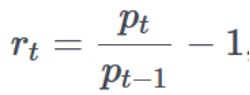

Text(0.5, 0, 'Adjusted closing price')

<Figure size 576x432 with 0 Axes>

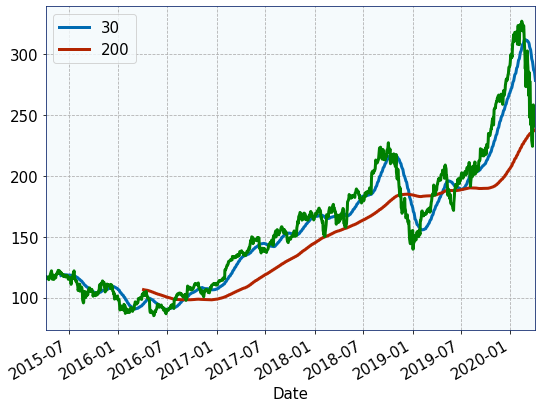

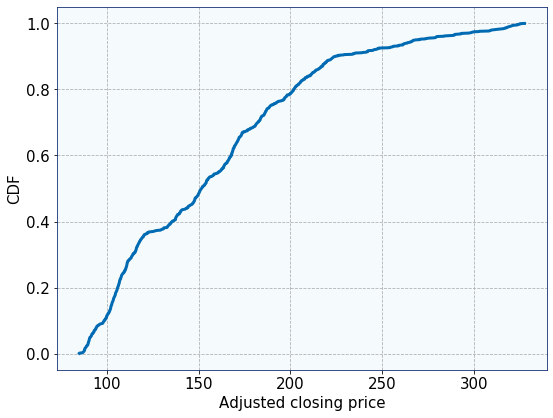

In [26]:
# Adjusted closing price
daily_close = data['Adj Close']

# Moving average
plt.figure()
moving_avg = pd.DataFrame()
moving_avg['30'] = daily_close.rolling(window=40).mean()
moving_avg['200'] = daily_close.rolling(window=252).mean()
moving_avg.plot()
data['Adj Close'].plot()


# CDF plot
daily_close_np = daily_close.to_numpy()
daily_close_np = daily_close_np.reshape([daily_close_np.shape[0],])
plt.figure()
X, Y = cdfplot(daily_close_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Adjusted closing price")

Date
2015-04-06         NaN
2015-04-07   -0.010522
2015-04-08   -0.003254
2015-04-09    0.007643
2015-04-10    0.004267
Name: Adj Close, dtype: float64
count    1259.000000
mean        0.000733
std         0.017810
min        -0.128647
25%        -0.006013
50%         0.000574
75%         0.009000
max         0.119808
Name: Adj Close, dtype: float64
Date
2015-04-06         NaN
2015-04-07   -0.010578
2015-04-08   -0.003259
2015-04-09    0.007614
2015-04-10    0.004258
Name: Adj Close, dtype: float64


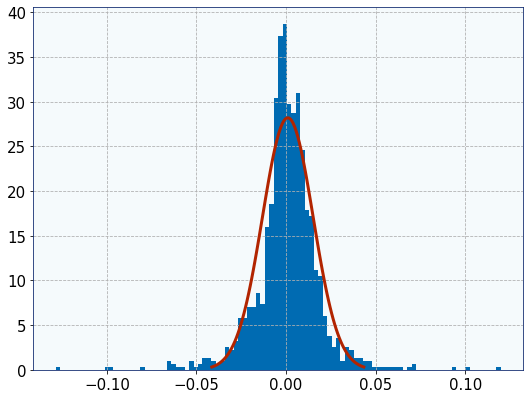

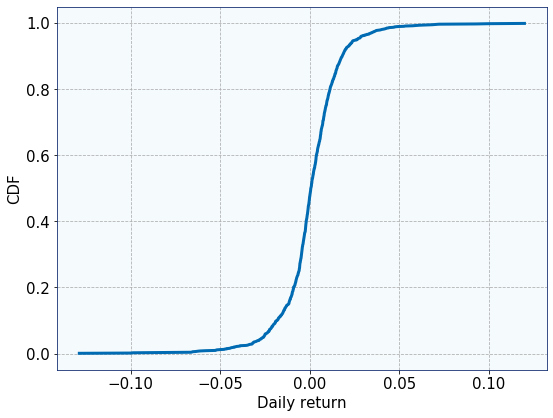

In [15]:
# Daily return
daily_pct_change = daily_close.pct_change()
print(daily_pct_change.head())

# PDF
plt.figure()
daily_pct_change.hist(bins=100, density=1)

mu = 0.000984
variance = 0.0002
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# CDF
daily_pct_change_np = daily_pct_change.to_numpy()
daily_pct_change_np = daily_pct_change_np.reshape([daily_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(daily_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Daily return")

print(daily_pct_change.describe())

# Daily log return
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head())

Text(0.5, 0, 'Monthly return')

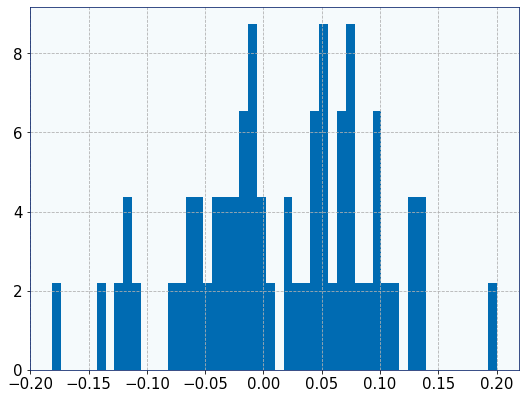

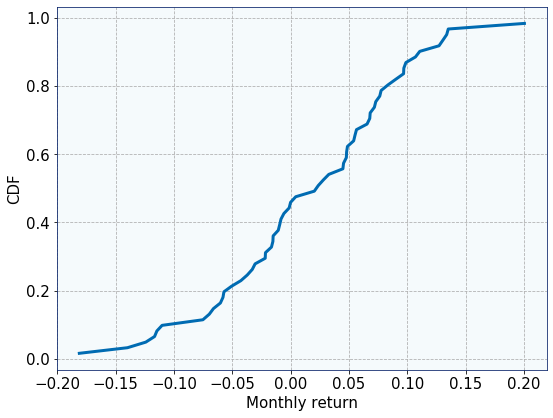

In [16]:
# Last day of the month
monthly = data.resample('BM').apply(lambda x: x[-1])
# Monthly return
monthly_pct_change = monthly['Adj Close'].pct_change()

# PDF
monthly_pct_change.hist(bins=50, density=1)

# CDF
monthly_pct_change_np = monthly_pct_change.to_numpy()
monthly_pct_change_np = monthly_pct_change_np.reshape([monthly_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(monthly_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Monthly return")

Text(0.5, 0, 'Quarter return')

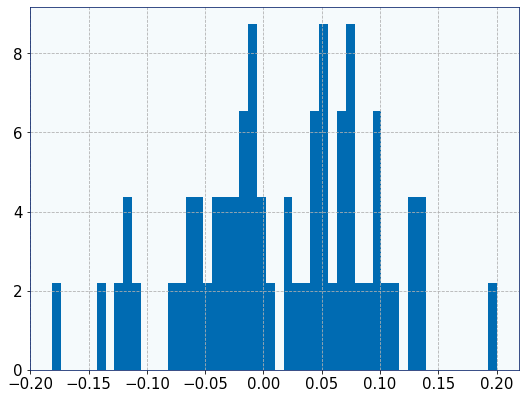

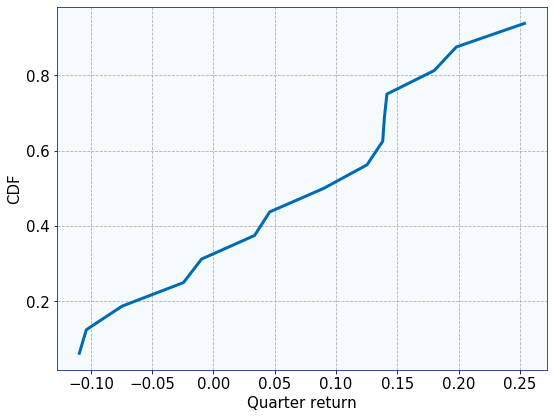

In [17]:
# Quarter mean
quarter = data.resample("4M").mean()
# Quarter return
quarter_pct_change = quarter['Adj Close'].pct_change()

# PDF
monthly_pct_change.hist(bins=50, density=1)

# CDF
quarter_pct_change_np = quarter_pct_change.to_numpy()
quarter_pct_change_np = quarter_pct_change_np.reshape([quarter_pct_change_np.shape[0],])
plt.figure()
X, Y = cdfplot(quarter_pct_change_np)
plt.plot(X, Y)
plt.ylabel("CDF")
plt.xlabel("Quarter return")

Date
2020-03-30    2.174239
2020-03-31    2.169802
2020-04-01    2.055633
2020-04-02    2.089935
2020-04-03    2.059900
Name: Adj Close, dtype: float64


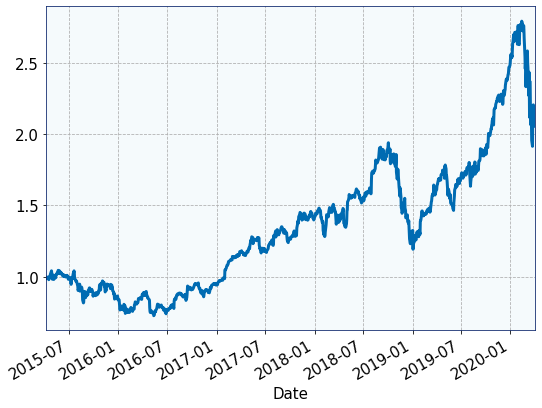

In [18]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return.tail())
cum_daily_return.plot()

[*********************100%***********************]  4 of 4 completed


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25969b70>,
      dtype=object)

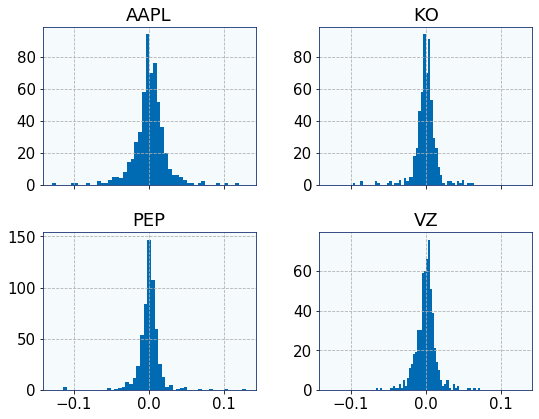

In [19]:
tickers = ['AAPL', 'VZ', 'KO', 'PEP']

stock = yf.download(tickers,'2018-01-01')

daily_pct_change = stock['Adj Close'].pct_change()
daily_pct_change.hist(bins=50, sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26c0d0f0>,
      dtype=object)

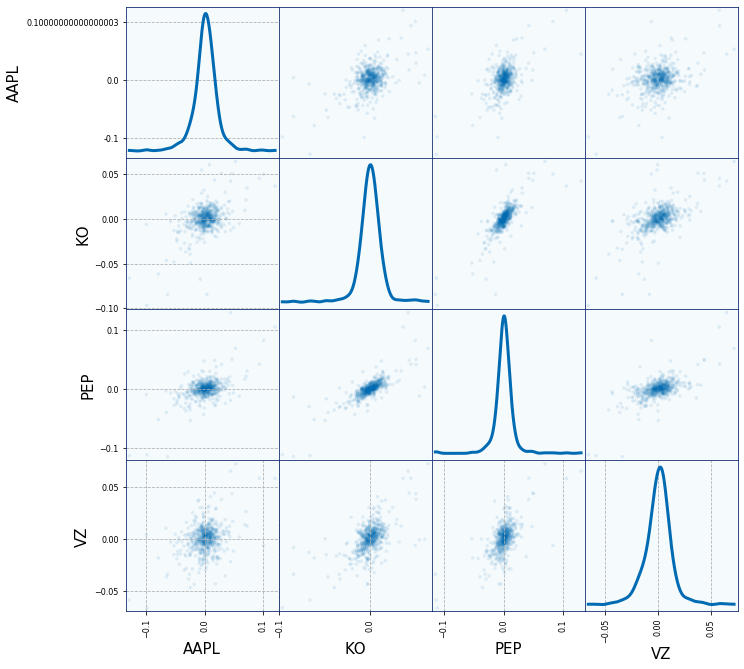

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(10,10))

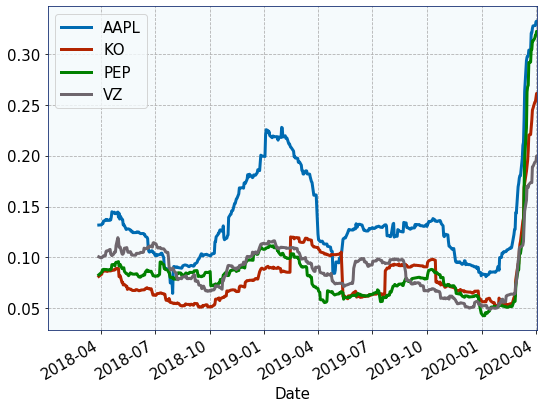

In [21]:
min_period = 60 
volatility = daily_pct_change.rolling(min_period).std() * np.sqrt(min_period) 
volatility.plot()